___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [92]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline
import pandas_datareader.data as web

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [7]:
start = dt.datetime(2006, 1, 1)

In [8]:
end = dt.datetime(2016, 1, 1)

In [107]:
BOA = web.DataReader("BAC", 'yahoo', start, end)
CIT = web.DataReader("C", 'yahoo', start, end)
GSA = web.DataReader("GS", 'yahoo', start, end)
CHS = web.DataReader("JPM", 'yahoo', start, end)
MST = web.DataReader("MS", 'yahoo', start, end)
WFA = web.DataReader("WFC", 'yahoo', start, end)


In [18]:
BAC.info()
BAC
CIT

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,358.130676
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,351.518860
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,353.262543
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,353.262543
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,351.591400
...,...,...,...,...,...,...
2015-12-24,52.970001,52.450001,52.480000,52.709999,4671200.0,44.418953
2015-12-28,52.570000,51.959999,52.570000,52.380001,8761700.0,44.140862
2015-12-29,53.220001,52.740002,52.759998,52.980000,10155100.0,44.646484


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [16]:
tickers=['BOA','CIT','GSA','CHS','MST','WFA']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [27]:
test = pd.concat([BOA, CIT, GSA, CHS, MST, WFA],axis=1)
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   High       2517 non-null   float64
 7   Low        2517 non-null   float64
 8   Open       2517 non-null   float64
 9   Close      2517 non-null   float64
 10  Volume     2517 non-null   float64
 11  Adj Close  2517 non-null   float64
 12  High       2517 non-null   float64
 13  Low        2517 non-null   float64
 14  Open       2517 non-null   float64
 15  Close      2517 non-null   float64
 16  Volume     2517 non-null   float64
 17  Adj Close  2517 non-null   float64
 18  High       2517 non-null   float64
 19  Low        2517 non-null   flo

,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,...,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584072,493.799988,481.100006,490.000000,492.899994,...,57.169998,58.310001,5377000.0,35.224953,31.975000,31.195000,31.600000,31.900000,11016400.0,20.242819
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227402,491.000000,483.500000,488.600006,483.799988,...,58.700001,58.349998,7977800.0,35.249123,31.820000,31.365000,31.799999,31.530001,10870000.0,20.008028
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270214,487.799988,484.000000,484.399994,486.200012,...,58.549999,58.509998,5778000.0,35.345787,31.555000,31.309999,31.500000,31.495001,10158000.0,19.985821
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220276,489.000000,482.000000,488.799988,486.200012,...,58.770000,58.570000,6889800.0,35.382034,31.775000,31.385000,31.580000,31.680000,8403800.0,20.103218
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241646,487.399994,483.000000,486.000000,483.899994,...,58.630001,59.189999,4144500.0,35.756569,31.825001,31.555000,31.674999,31.674999,5619600.0,20.100037


In [19]:
bank_stocks = pd.concat([BOA, CIT, GSA, CHS, MST, WFA],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [20]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [21]:
bank_stocks.head()

Bank Ticker        BOA                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                    CIT                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584072  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227402  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270214  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220276  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241646  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker        MST                                         WFA             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224953  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249123  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345787  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382034  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756569  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242819  
2006-01-04   31.799999  31.530001  10870000.0  20.008028  
2006-01-05   31.500000  31.495001  10158000.0  19.985821  
2006-01-06   31.580000  31.680000   8403800.0  20.103218  
2006-01-09   31.674999  31.674999   5619600.0  20.100037  

[5 rows x 36 columns]

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [58]:
bank_stocks.xs('Close',level=1,axis=1,drop_level=False).max()

Bank Ticker  Stock Info
BOA          Close          54.900002
CIT          Close         564.099976
GSA          Close         247.919998
CHS          Close          70.080002
MST          Close          89.300003
WFA          Close          58.520000
dtype: float64

""


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [124]:
returns=pd.DataFrame()
returns

""


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

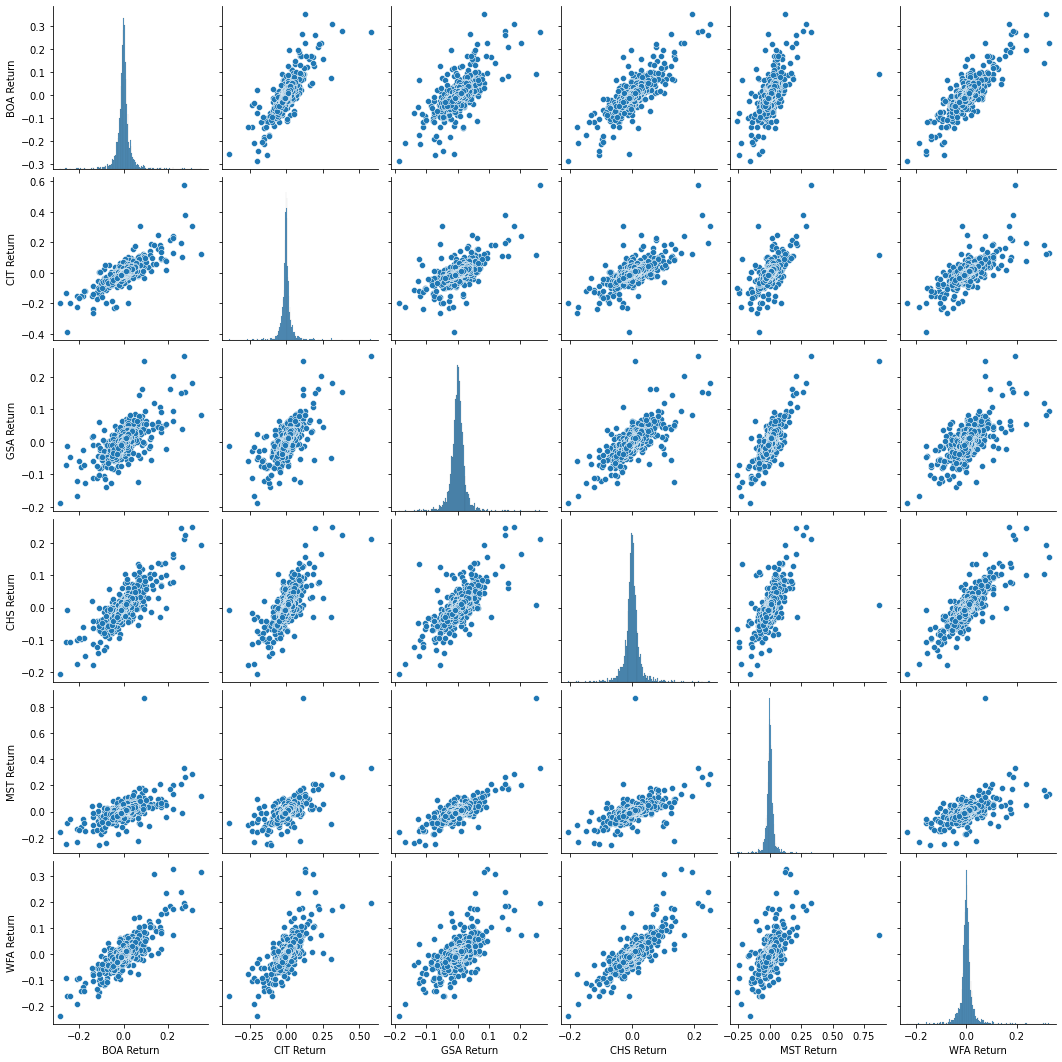

In [125]:
# returns=bank_stocks.xs('Close',level=1,axis=1,drop_level=True).pct_change()
# returns
# returns.columns = [str(col) + ' Return' for col in returns.columns]

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()
sns.pairplot(returns[1:])
# bank_stocks['BOA']['Close'].pct_change()
# retruns.set_levels([])
# lt=['BOA','CIT','GSA','CHS','MST','WFA']
# for i in lt:
#     returns.columns.set_levels([i+'return'],level=0,axis=1,inplace=True)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [100]:
returns.info()
returns[1:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BOA Return  2516 non-null   float64
 1   CIT Return  2516 non-null   float64
 2   GSA Return  2516 non-null   float64
 3   CHS Return  2516 non-null   float64
 4   MST Return  2516 non-null   float64
 5   WFA Return  2516 non-null   float64
dtypes: float64(6)
memory usage: 202.2 KB


,BOA Return,CIT Return,GSA Return,CHS Return,MST Return,WFA Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


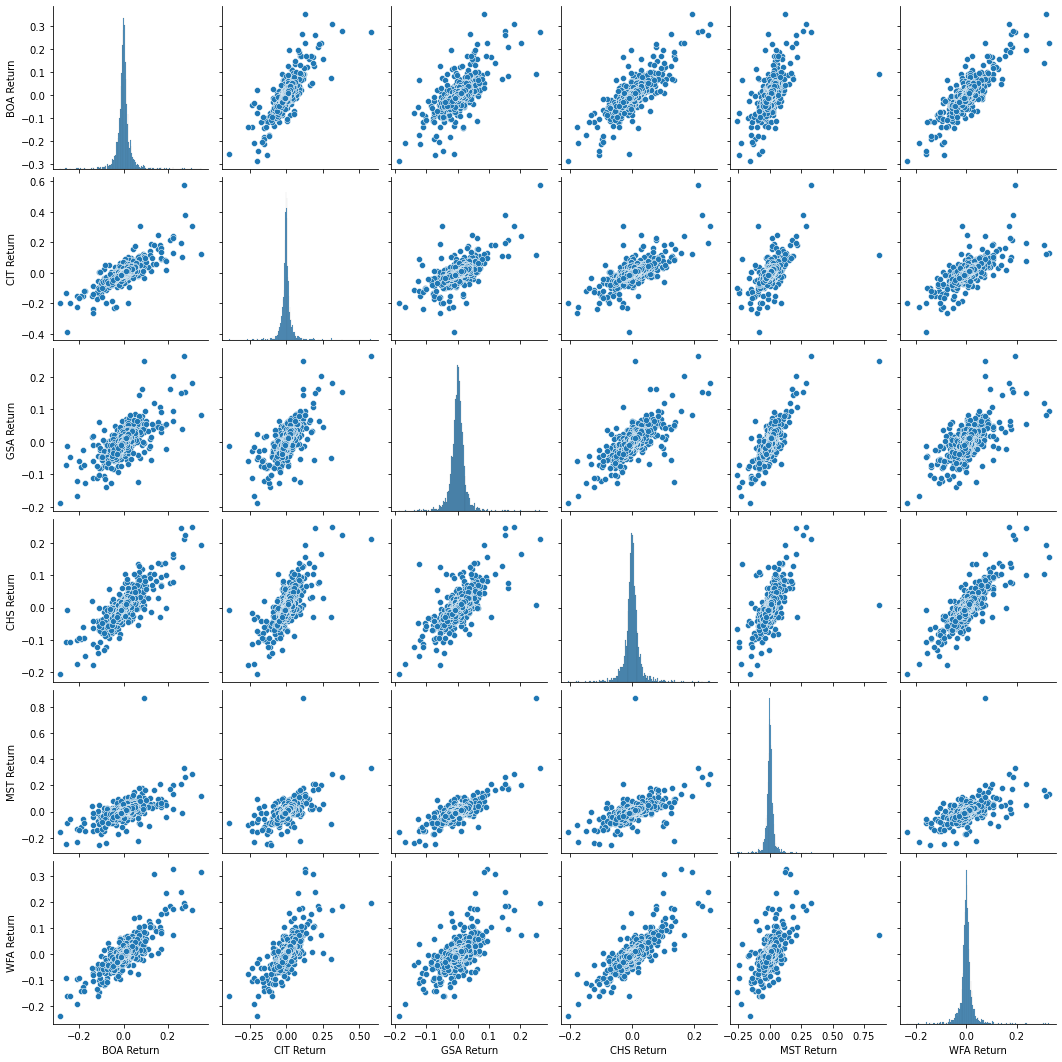

In [101]:
sns.pairplot(returns)

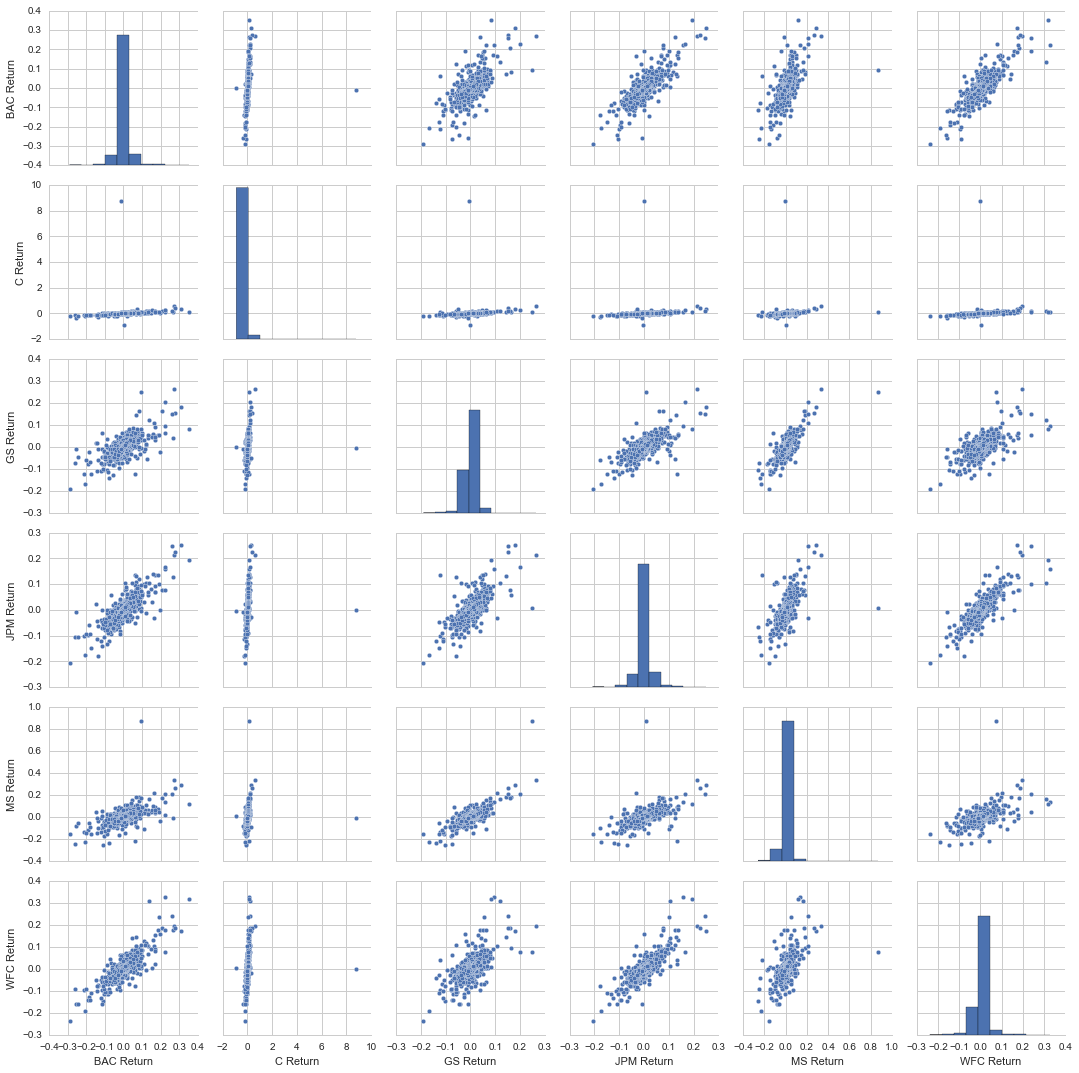

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [112]:
returns.idxmin()

BOA Return   2009-01-20
CIT Return   2009-02-27
GSA Return   2009-01-20
CHS Return   2009-01-20
MST Return   2008-10-09
WFA Return   2009-01-20
dtype: datetime64[ns]

In [113]:
returns.idxmax()

BOA Return   2009-04-09
CIT Return   2008-11-24
GSA Return   2008-11-24
CHS Return   2009-01-21
MST Return   2008-10-13
WFA Return   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [114]:
returns.std()

BOA Return    0.036647
CIT Return    0.038672
GSA Return    0.025390
CHS Return    0.027667
MST Return    0.037819
WFA Return    0.030238
dtype: float64

In [127]:
returns

,BOA Return,CIT Return,GSA Return,CHS Return,MST Return,WFA Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [129]:
returns.loc['2015-01-01':'2015-12-31']

,BOA Return,CIT Return,GSA Return,CHS Return,MST Return,WFA Return
Date,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Srividya Shashidhara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MST Return', ylabel='Density'>

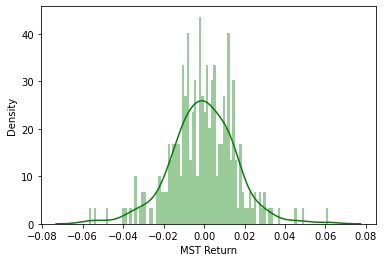

In [131]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MST Return'],color='green',bins=100)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



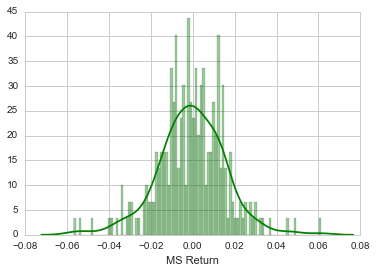

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='CIT Return', ylabel='Count'>

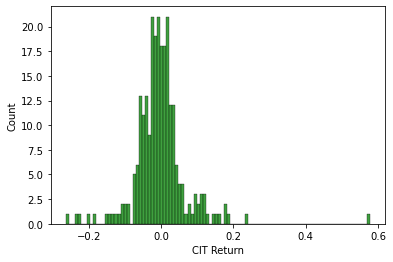

In [137]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['CIT Return'],color='green',bins=100)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



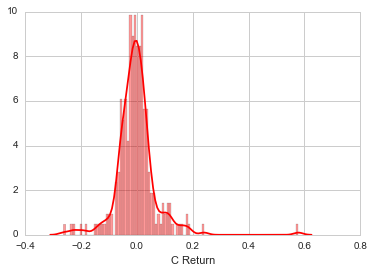

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [139]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: backcall in c:\users\srividya shashidhara\anaconda3\lib\site-packages (from ipython>=5.3.0->cufflinks) (0.2.0)

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=83aa655303dd787a51a22c88ef3b62e441cd02ebc1cdb91e06264245af70fca8
  Stored in directory: c:\users\srividya shashidhara\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<AxesSubplot:xlabel='Date'>

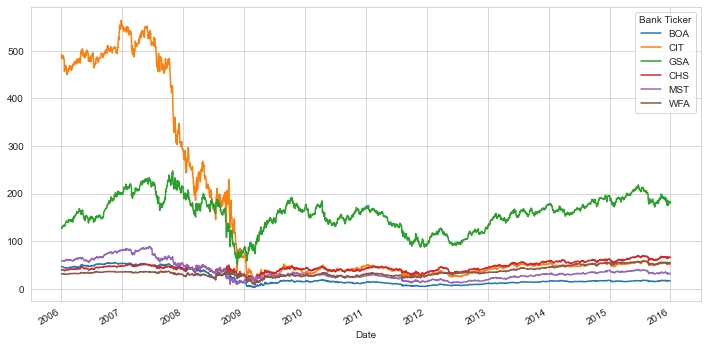

In [151]:
bank_stocks.xs('Close',level=1,axis=1).plot(figsize=(12,6))

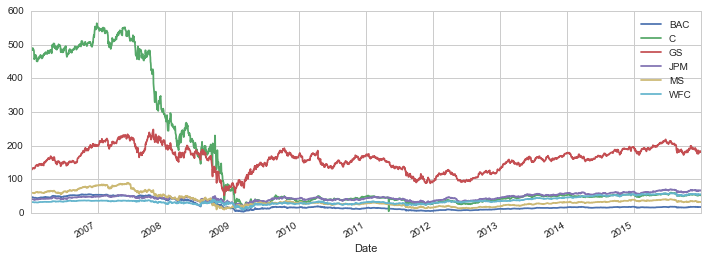

In [152]:
bank_stocks.xs('Close',level=1,axis=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

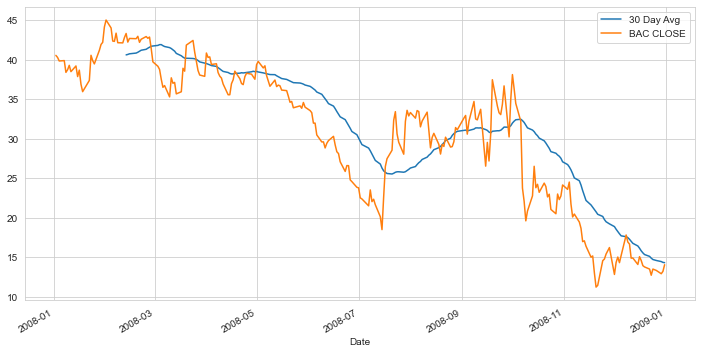

In [153]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

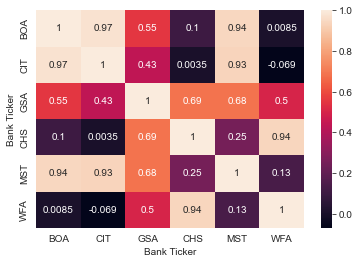

In [154]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

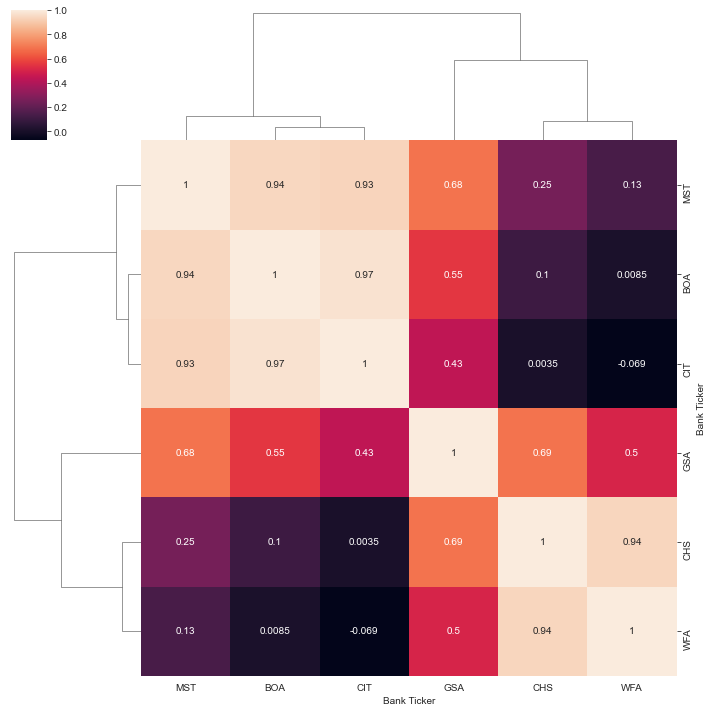

In [155]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [156]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.